In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# TODO input the estimation factors
prod = 0 # production stage factor
constr = 0.05 # construction stage factor
usage = 0 # useage stage factor
instl = 0 # installation factor
ftr = 0 # transport factor of the SMF
# input of environmental impacts
EI_bld = 188.81 # impact of the factory building in ton CO2-eq
EI_mach = 174.39 # impact of the machinery in ton CO2-eq
EI_sys = 20.97 # impact of the building service system of the SMF, such as the lighting, air conditioner, etc.in ton CO2-eq
# input of environmental indicators
I_ttr1 = 0.012/1000 # impact indicator of the transport method on the installation line in ton CO2-eq/tkm
I_ttr2 = 0.118/1000 # impact indicator of the transport method from the SMF to the installation line in ton CO2-eq/tkm
I_ftr = 0.118/1000
I_u = 1.889
I_tp = 22.578
# input of infrastructure description
L_I = 96
L_t = 0.02
m_t = 60
M_f = 241.47
d_f = 0.05
L_s = np.linspace(0.5, 10*L_I, 50*L_I)

In [4]:
# TODO storage of results
dfEI_opt = pd.DataFrame(columns=['L_sopt','T_opt','EI_ttropt','EI_tropt','EI_fmopt','EI_copt','L_seq','EI_ttreq','EI_fmeq','EI_treq'])
dfEI_ttr = pd.DataFrame()
dfEI_fm = pd.DataFrame()
dfEI_tr = pd.DataFrame()
# TODO parameter exploration
for j in range(1,11,1):
    L_I = 96*j
    L_I = round(L_I,1)
    column_name = str(L_I) # ! name the variable 
    # Start calculation
    N_t = L_I/L_t
    M_t = m_t*N_t
    t = L_s/L_t
    s = L_I/L_s
    T = s-1
    D_smf = L_I-L_s
    D_ins = (L_I/(4*L_t))*L_s + N_t*d_f
# Impact estimation
    EI_p = (1+prod)*(EI_bld+EI_mach+EI_sys)
    EI_tp = (1+instl)*I_tp*N_t
    ei_c = constr*EI_p
    EI_c = s*ei_c
    EI_u = (1+usage)*I_u*N_t
    EI_ttr = (0.25*I_ttr1*M_t*L_s + I_ttr2*M_t*d_f)
    EI_ftr = (1+ftr)*I_ftr*M_f*D_smf
    EI_fm = EI_c + EI_ftr
    EI_tr = EI_fm + EI_ttr
# Optimal length of infrastructure section
    L_sopt = pow(L_I*ei_c/(0.25*I_ttr1*M_t-(1+ftr)*I_ftr*M_f),0.5)
    T_opt = L_I/L_sopt - 1
    EI_ttropt = (0.25*I_ttr1*M_t*L_sopt + I_ttr2*N_t*m_t*d_f)
    EI_ftropt = (1+ftr)*I_ftr*M_f*(L_I-L_sopt)
    EI_fmopt = L_I/L_sopt*ei_c + (1+ftr)*I_ftr*M_f*(L_I-L_sopt)
    EI_tropt = EI_ttropt + EI_fmopt
    EI_copt = L_I/L_sopt*ei_c
# Equilibrium length when the transport impact of the SMF equals to the transport impact of the transport of  the tube sections
    a = -(1+ftr)*I_ftr*M_f-0.25*M_t*I_ttr1
    b = (1+ftr)*I_ftr*M_f*L_I-M_t*d_f*I_ttr2
    c = L_I*ei_c
    delta = pow (b,2) - 4*a*c
    L_seq = (-b-pow(delta,0.5))/(2*a)
    EI_ttreq = (0.25*I_ttr1*M_t*L_seq + I_ttr2*N_t*m_t*d_f)
    EI_fmeq = L_I/L_seq*ei_c + (1+ftr)*I_ftr*M_f*(L_I-L_seq)
    EI_treq = EI_fmeq + EI_ttreq
# TODO Store results
    dfEI_opt.loc[j-1,:] = [L_sopt,T_opt,EI_ttropt,EI_tropt,EI_fmopt,EI_copt,L_seq,EI_ttreq,EI_fmeq,EI_treq]
    EI_tr = pd.DataFrame(EI_tr)
    EI_ttr = pd.DataFrame(EI_ttr)
    EI_fm = pd.DataFrame(EI_fm)
    dfEI_tr.loc[:,j] = EI_tr
    dfEI_tr.rename(columns={j:column_name}, inplace=True)
    dfEI_ttr.loc[:,j] = EI_ttr
    dfEI_ttr.rename(columns={j:column_name}, inplace=True)
    dfEI_fm.loc[:,j] = EI_fm
    dfEI_fm.rename(columns={j:column_name}, inplace=True)

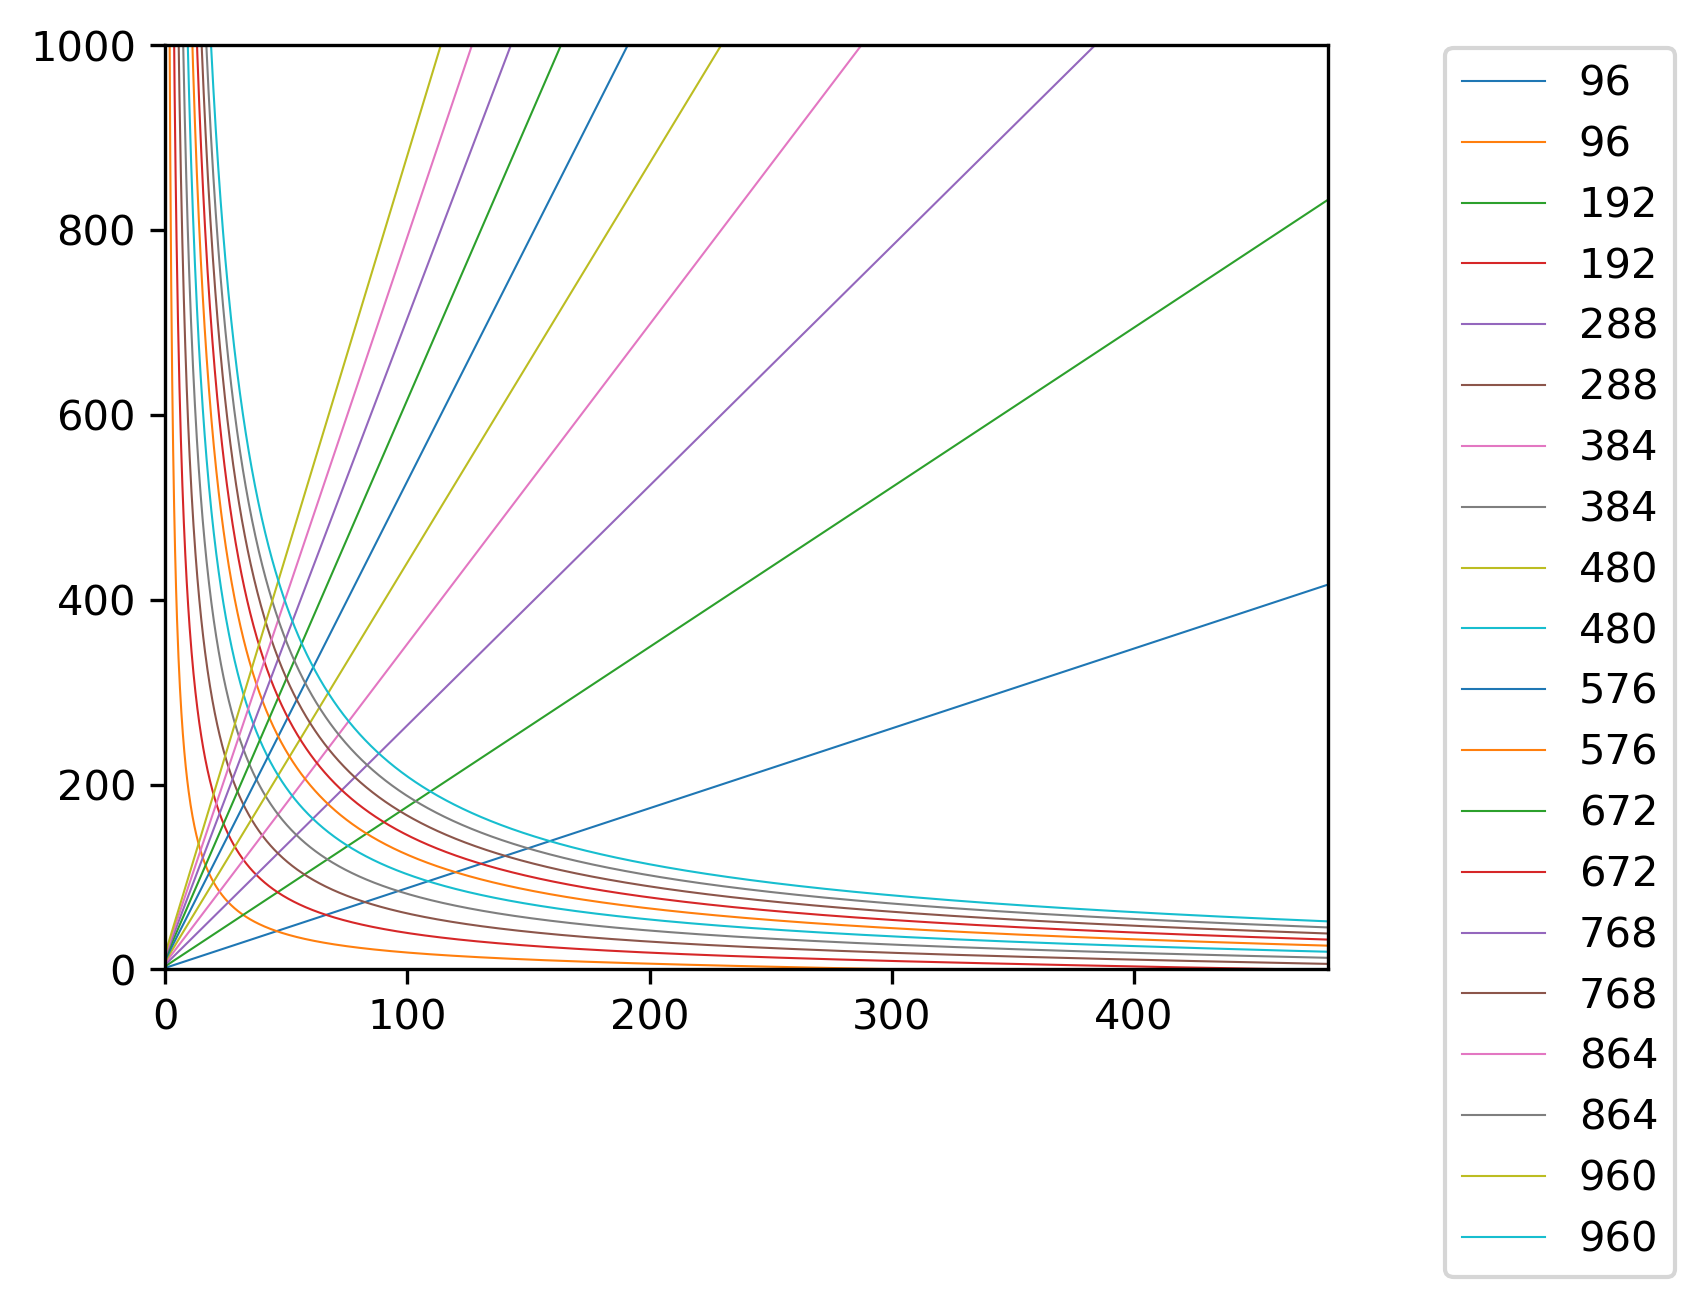

In [5]:
# Test plot block
fig0, ax = plt.subplots(figsize=(5,4),dpi=300)
datalen = len (dfEI_ttr.columns)
for l in range(0,datalen,1):
   ax.plot(L_s, dfEI_ttr.iloc[:,l], label = str(dfEI_ttr.columns[l]),lw=0.5)
   ax.plot(L_s, dfEI_fm.iloc[:,l], label = str(dfEI_fm.columns[l]),lw=0.5)
ax.set_xlim(0,96*5)
ax.set_ylim(0,1000)
ax.legend(loc = 'upper center', bbox_to_anchor=(1.2, 1.02),ncol=1)

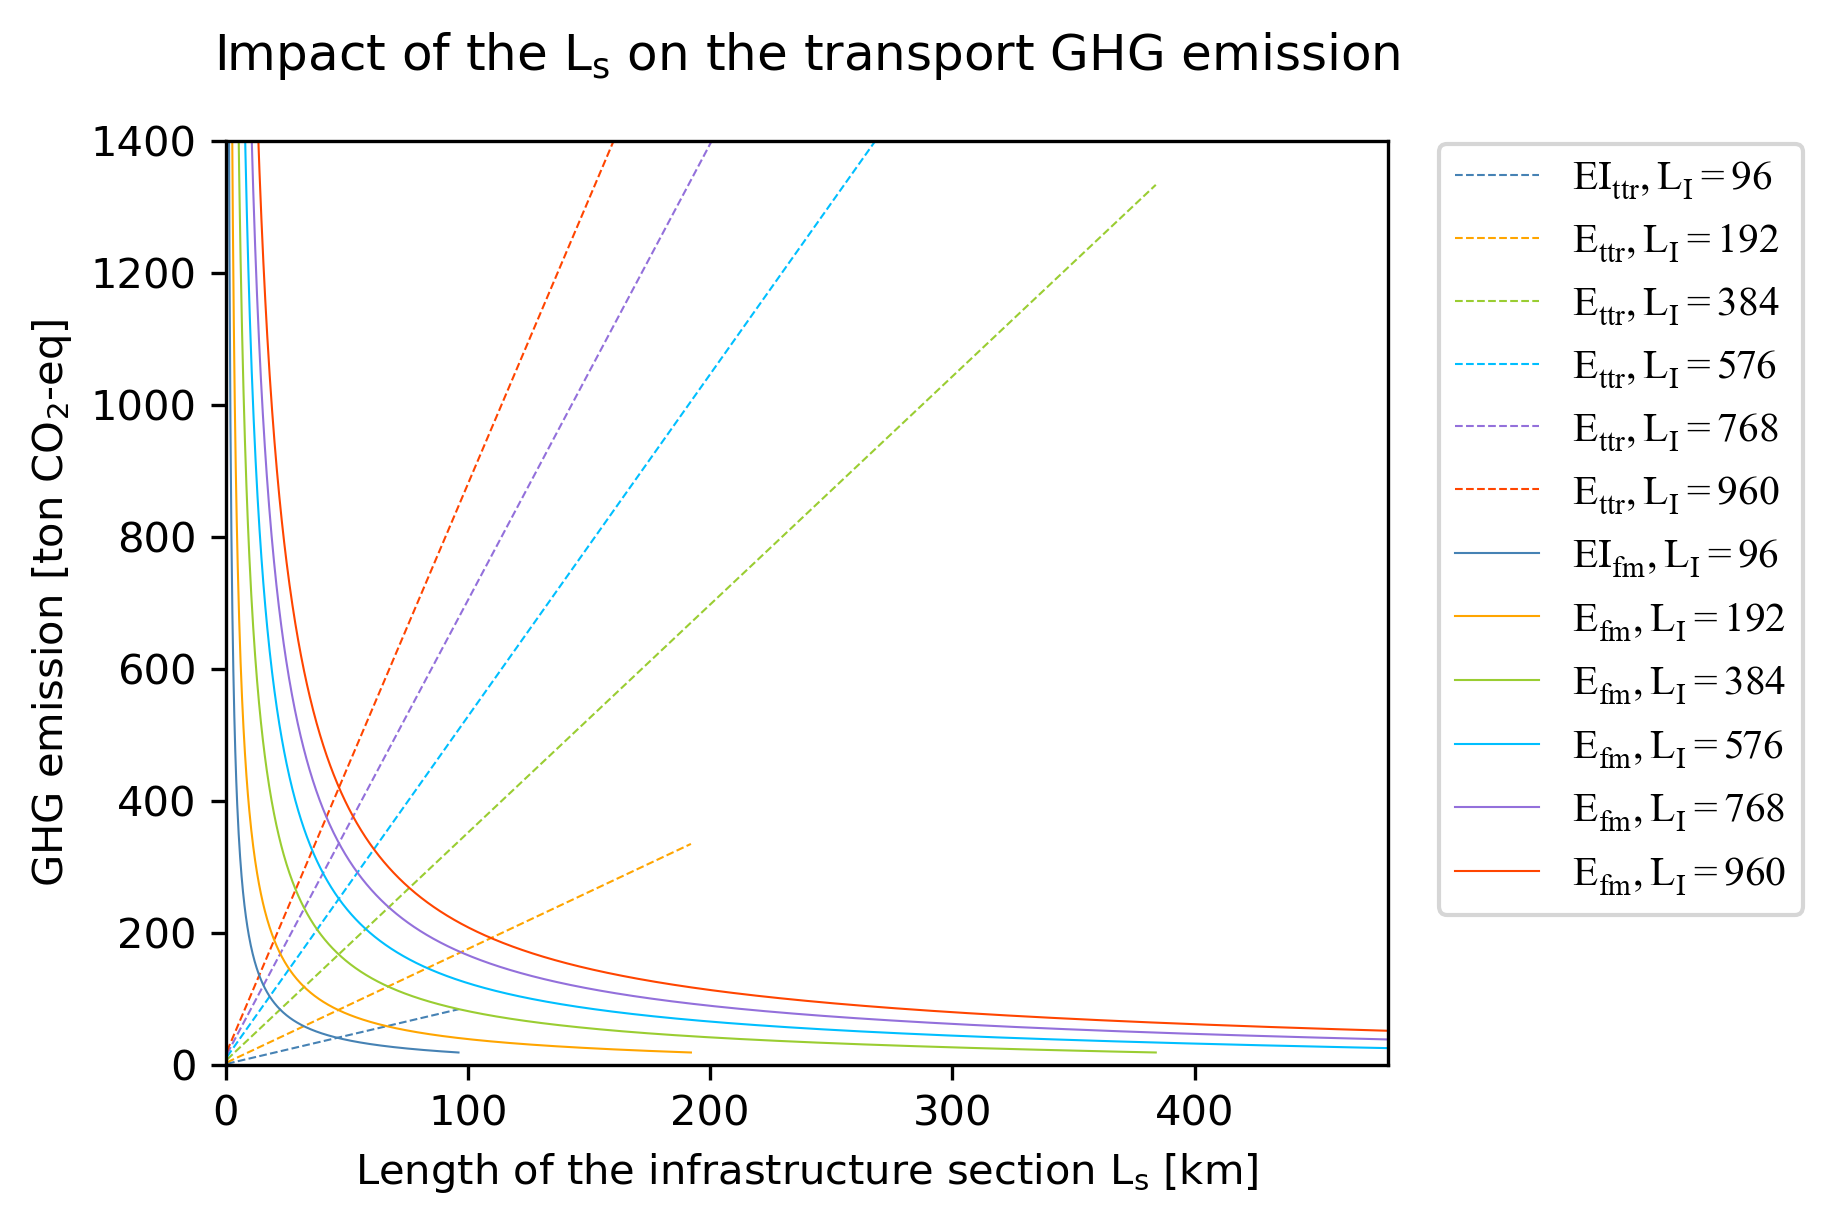

In [6]:
# Plot results
fig1, ax = plt.subplots(figsize=(5,4),dpi=300)
plt.rc('font', family='Times New Roman')
plt.rcParams['mathtext.default'] = 'regular'
ax.set_title(r'Impact of the $L_s$ on the transport GHG emission',y=1.05) 
datalen = len (dfEI_ttr.columns)
ax.plot(L_s[0:479],dfEI_ttr.iloc[0:479:,0],'--', label = r'$EI_{ttr},L_{I}=96$',lw=0.5,c='steelblue')
ax.plot(L_s[0:959],dfEI_ttr.iloc[0:959:,1], '--', label = r'$E_{ttr},L_{I}=192$',lw=0.5,c='orange')
ax.plot(L_s[0:1919],dfEI_ttr.iloc[0:1919:,3], '--', label = r'$E_{ttr},L_{I}=384$',lw=0.5,c='yellowgreen')
ax.plot(L_s[0:2879],dfEI_ttr.iloc[0:2879:,5], '--', label = r'$E_{ttr},L_{I}=576$',lw=0.5,c='deepskyblue')
ax.plot(L_s[0:3839],dfEI_ttr.iloc[0:3839:,7], '--', label = r'$E_{ttr},L_{I}=768$',lw=0.5,c='mediumpurple')
ax.plot(L_s[0:479+480*(datalen-1)],dfEI_ttr.iloc[0:479+480*(datalen-1):,datalen-1], '--', label = r'$E_{ttr},L_{I}=960$',lw=0.5,c='orangered')
ax.plot(L_s[0:479],dfEI_fm.iloc[0:479:,0], label = r'$EI_{fm},L_{I}=96$',lw=0.5, c='steelblue')
ax.plot(L_s[0:959],dfEI_fm.iloc[0:959:,1], label = r'$E_{fm},L_{I}=192$',lw=0.5,c='orange')
ax.plot(L_s[0:1919],dfEI_fm.iloc[0:1919:,3], label = r'$E_{fm},L_{I}=384$',lw=0.5,c='yellowgreen')
ax.plot(L_s[0:2879],dfEI_fm.iloc[0:2879:,5], label = r'$E_{fm},L_{I}=576$',lw=0.5,c='deepskyblue')
ax.plot(L_s[0:3839],dfEI_fm.iloc[0:3839:,7], label = r'$E_{fm},L_{I}=768$',lw=0.5,c='mediumpurple')
ax.plot(L_s[0:479+480*(datalen-1)],dfEI_fm.iloc[0:479+480*(datalen-1),datalen-1], label = r'$E_{fm},L_{I}=960$',lw=0.5,c='orangered')
ax.set_xlabel(r'Length of the infrastructure section $L_s$ [km]')
ax.set_ylabel('GHG emission [ton CO$_2$-eq]')
ax.set_xlim(0,480)
ax.set_ylim(0,1400)
ax.legend(loc = 'upper center', bbox_to_anchor=(1.2, 1.02),ncol=1)

46.97939456644356

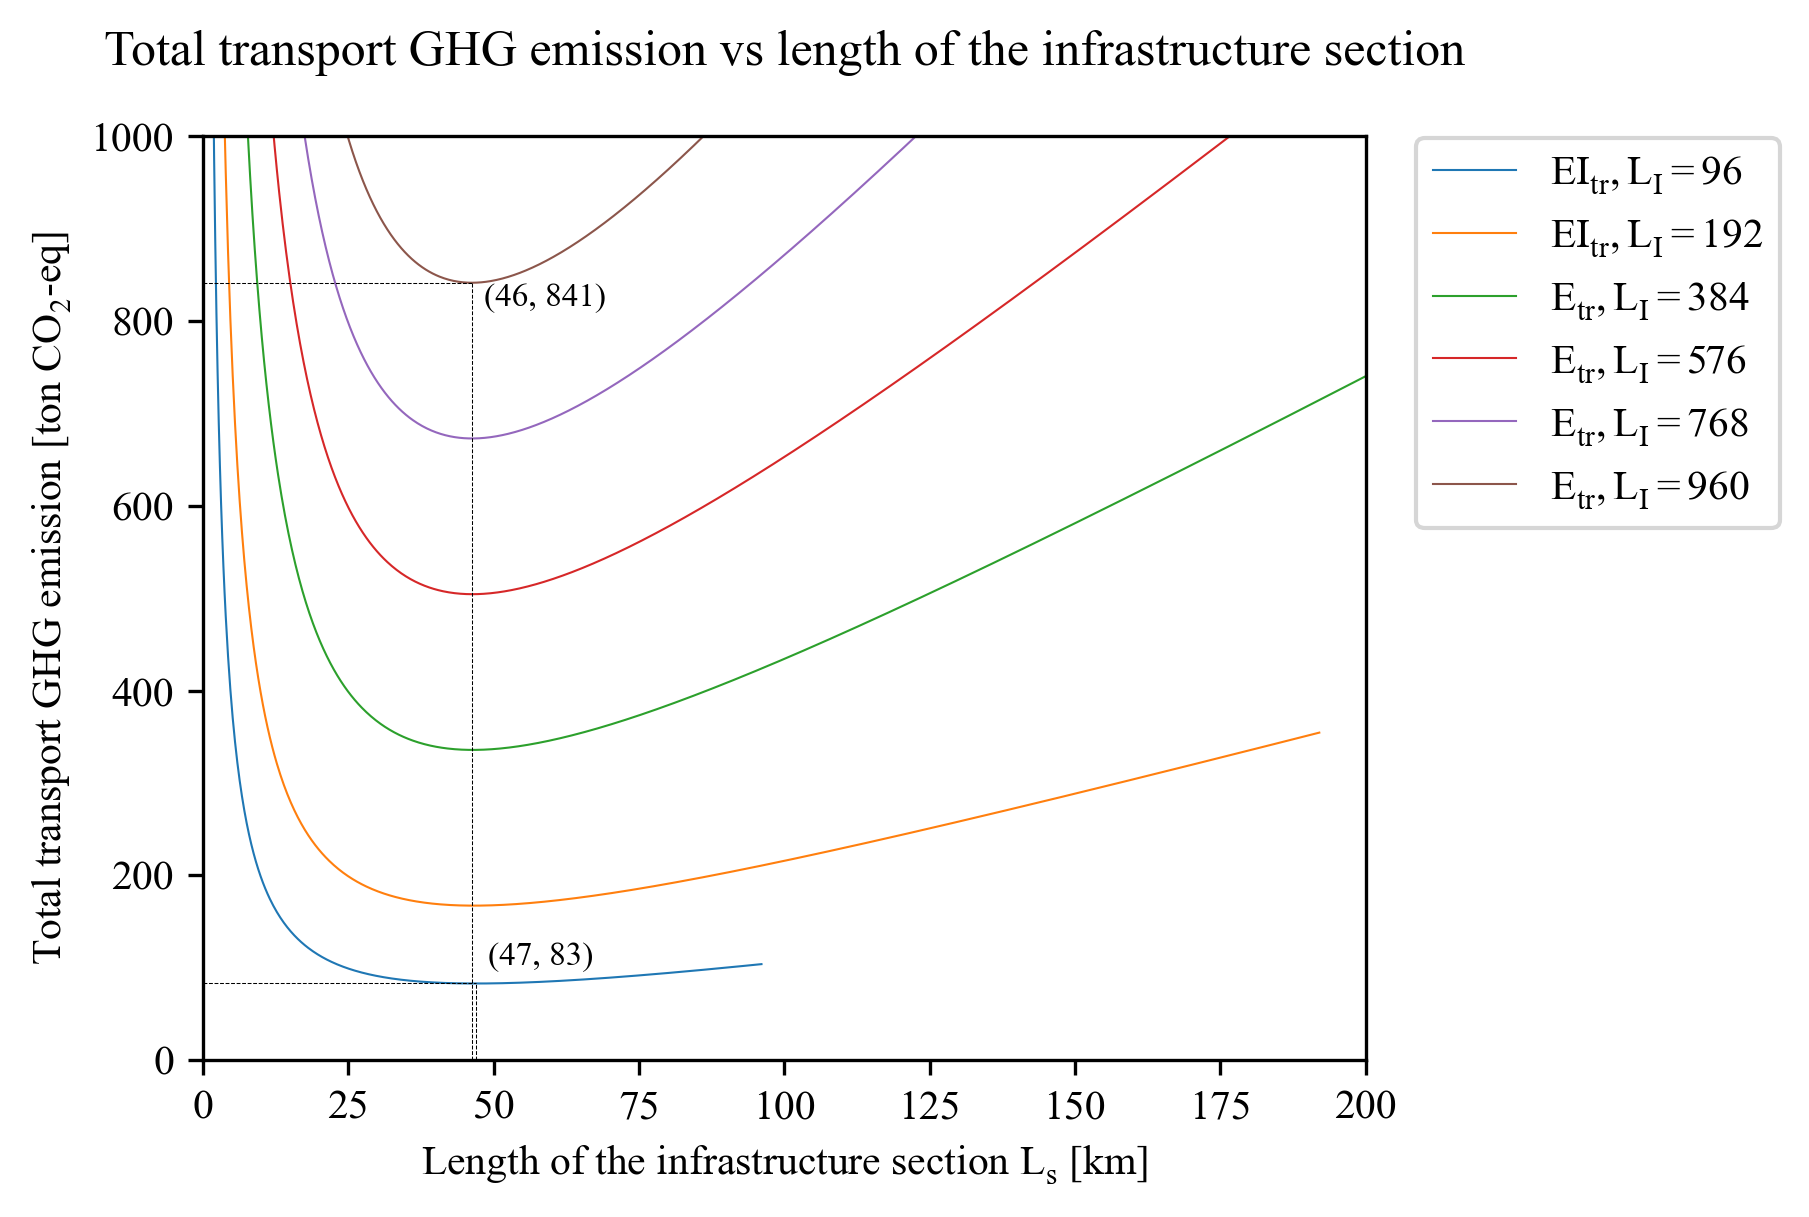

In [7]:
# Plot results
fig2, ax = plt.subplots(figsize=(5,4),dpi=300)
plt.rc('font', family='Times New Roman')
ax.set_title(r'Total transport GHG emission vs length of the infrastructure section',y=1.05) 
ax.plot(L_s[0:479],dfEI_tr.iloc[0:479:,0], label = r'$EI_{tr},L_{I}=96$',lw=0.5)
ax.plot([0,dfEI_opt.iloc[0,0]],[dfEI_opt.iloc[0,3],dfEI_opt.iloc[0,3]],'--',color='k',lw=0.25)
ax.plot([dfEI_opt.iloc[0,0],dfEI_opt.iloc[0,0]],[0,dfEI_opt.iloc[0,3]],'--',color='k',lw=0.25)
ax.text(dfEI_opt.iloc[0,0]+2,dfEI_opt.iloc[0,3]+20,(round(dfEI_opt.iloc[0,0]),round(dfEI_opt.iloc[0,3])),fontsize=8)
ax.plot(L_s[0:959],dfEI_tr.iloc[0:959:,1], label = r'$EI_{tr},L_{I}=192$',lw=0.5)
ax.plot(L_s[0:1919],dfEI_tr.iloc[0:1919:,3], label = r'$E_{tr},L_{I}=384$',lw=0.5)
ax.plot(L_s[0:2879],dfEI_tr.iloc[0:2879:,5], label = r'$E_{tr},L_{I}=576$',lw=0.5)
ax.plot(L_s[0:3839],dfEI_tr.iloc[0:3839:,7], label = r'$E_{tr},L_{I}=768$',lw=0.5)
ax.plot(L_s[0:479+480*(datalen-1)],dfEI_tr.iloc[0:479+480*(datalen-1):,9], label = r'$E_{tr},L_{I}=960$',lw=0.5)
ax.plot([0,dfEI_opt.iloc[datalen-1,0]],[dfEI_opt.iloc[datalen-1,3],dfEI_opt.iloc[datalen-1,3]],'--',color='k',lw=0.25)
ax.plot([dfEI_opt.iloc[datalen-1,0],dfEI_opt.iloc[datalen-1,0]],[0,dfEI_opt.iloc[datalen-1,3]],'--',color='k',lw=0.25)
ax.text(dfEI_opt.iloc[datalen-1,0]+2,dfEI_opt.iloc[datalen-1,3]-25,(round(dfEI_opt.iloc[datalen-1,0]),round(dfEI_opt.iloc[datalen-1,3])),fontsize=8)
# for l in range(0,datalength,1):
#    ax.plot(L_s, dfEI_ttr.iloc[:,l], label = str(dfEI_fm.columns[l]),lw=0.5)
#    ax.plot(L_s, dfEI_fm.iloc[:,l], label = str(dfEI_fm.columns[l]),lw=0.5)
ax.set_xlabel(r'Length of the infrastructure section $L_s$ [km]')
ax.set_ylabel('Total transport GHG emission [ton CO$_2$-eq]')
ax.set_xlim(0,200)
ax.set_ylim(0,1000)
ax.legend(loc = 'upper center', bbox_to_anchor=(1.2, 1.02),ncol=1)
dfEI_opt.iloc[0,0]

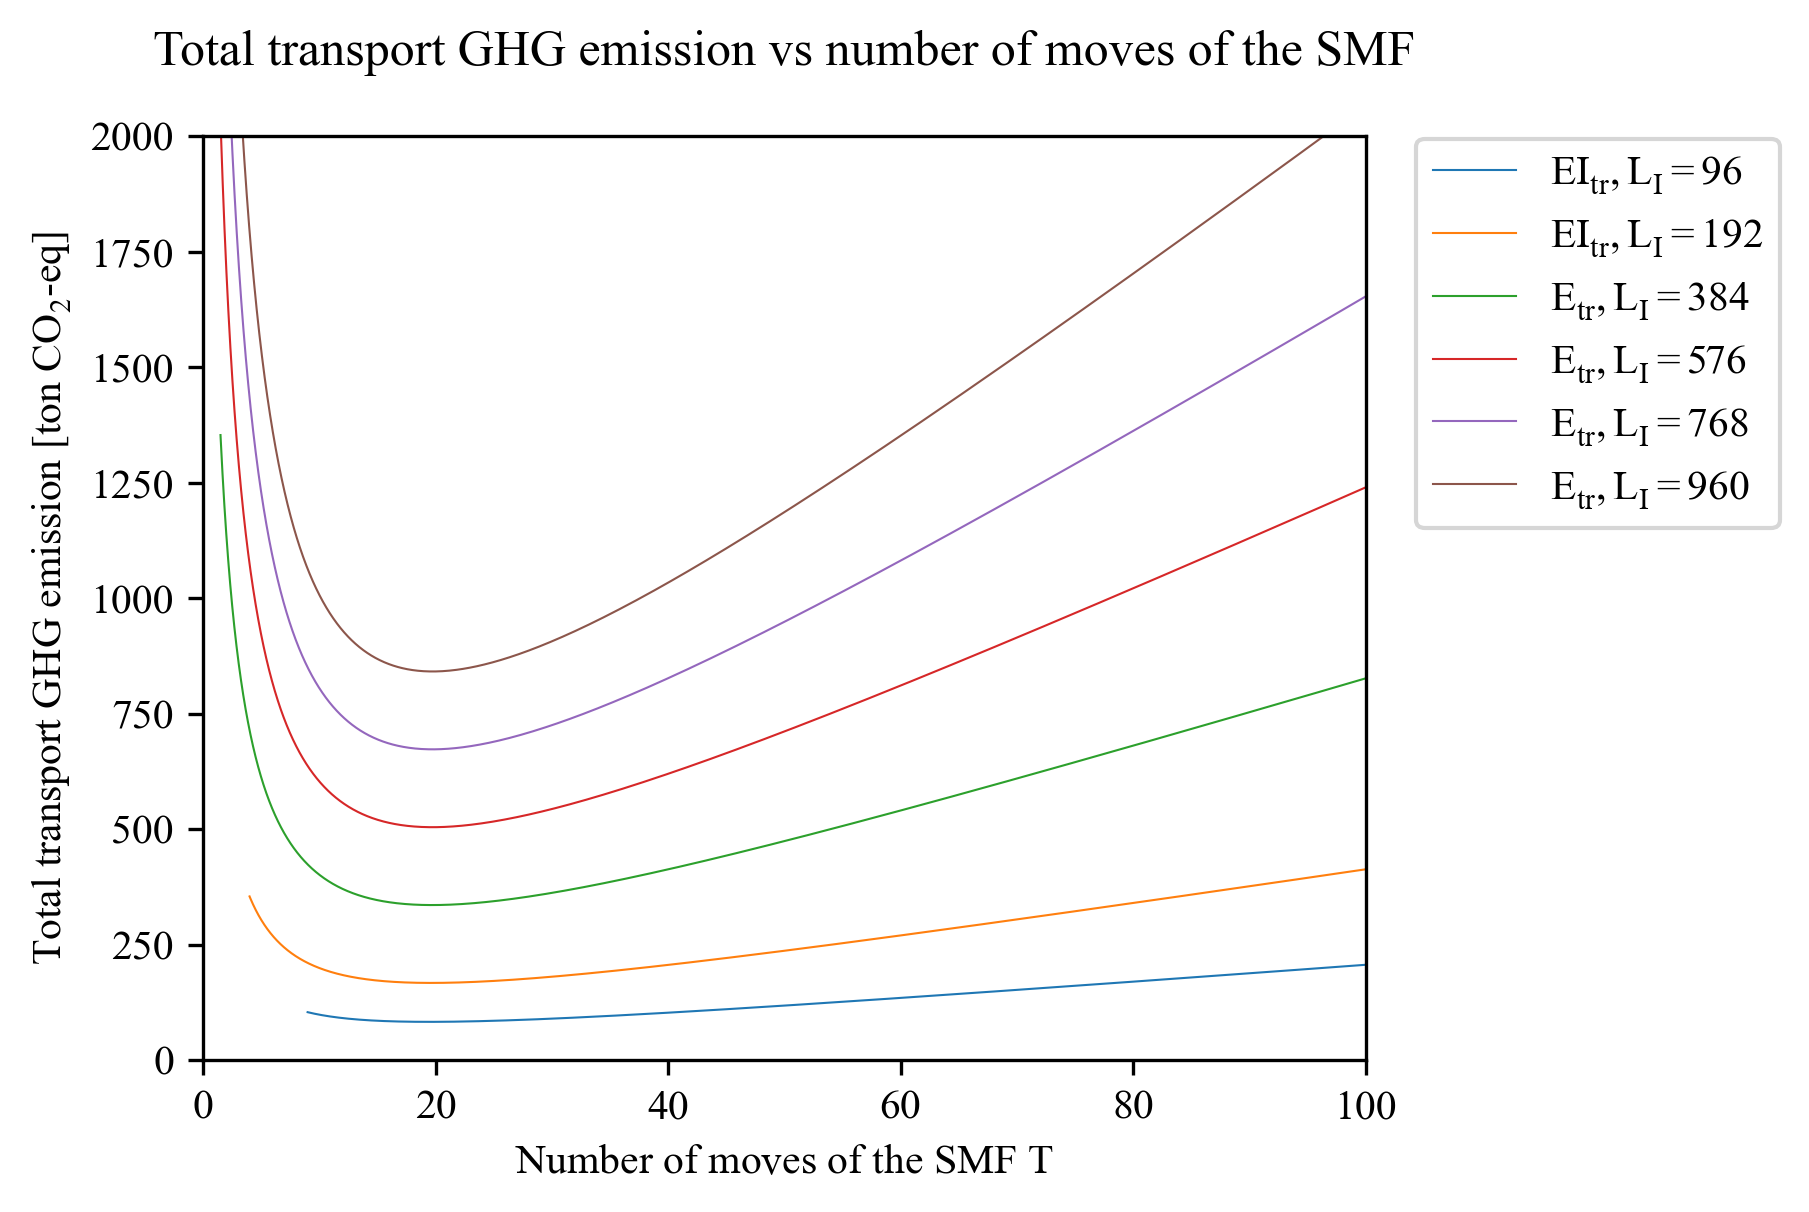

In [8]:
# Plot results
from matplotlib.pyplot import MultipleLocator
fig3, ax = plt.subplots(figsize=(5,4),dpi=300)
plt.rc('font', family='Times New Roman')
ax.set_title('Total transport GHG emission vs number of moves of the SMF',y=1.05) 
ax.plot(T[0:479],dfEI_tr.iloc[0:479:,0], label = r'$EI_{tr},L_{I}=96$',lw=0.5)
ax.plot(T[0:959],dfEI_tr.iloc[0:959:,1], label = r'$EI_{tr},L_{I}=192$',lw=0.5)
ax.plot(T[0:1919],dfEI_tr.iloc[0:1919:,3], label = r'$E_{tr},L_{I}=384$',lw=0.5)
ax.plot(T[0:2879],dfEI_tr.iloc[0:2879:,5], label = r'$E_{tr},L_{I}=576$',lw=0.5)
ax.plot(T[0:3839],dfEI_tr.iloc[0:3839:,7], label = r'$E_{tr},L_{I}=768$',lw=0.5)
ax.plot(T[0:479+480*(datalen-1)],dfEI_tr.iloc[0:479+480*(datalen-1):,9], label = r'$E_{tr},L_{I}=960$',lw=0.5)
# for l in range(0,datalength,1):
#    ax.plot(L_s, dfEI_ttr.iloc[:,l], label = str(dfEI_fm.columns[l]),lw=0.5)
#    ax.plot(L_s, dfEI_fm.iloc[:,l], label = str(dfEI_fm.columns[l]),lw=0.5)
ax.set_xlabel(r'Number of moves of the SMF $T$')
ax.set_ylabel('Total transport GHG emission [ton CO$_2$-eq]')
#x_major_locator = MultipleLocator(2)
#ax.xaxis.set_major_locator(x_major_locator)
ax.set_xlim(0,100)
ax.set_ylim(0,2000)
ax.legend(loc = 'upper center', bbox_to_anchor=(1.2, 1.02),ncol=1)